In [23]:
from tqdm.notebook import tqdm
from libs.ComputeResult import ComputeResult
import os
import pandas as pd
import numpy as np
import re
import glob

In [3]:
def compute_all():
    variations = ["affiliation", "first_author", "coverDate", "subject_area", "topic_dist", "bert", "citations_at", None]
    for feature in tqdm(variations):
        print(feature)
        cr = ComputeResult(feature)
        cr.fit()

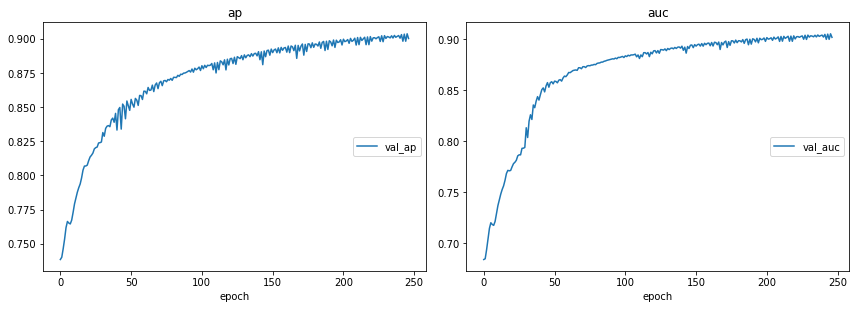

ap
	val_ap           	 (min:    0.738, max:    0.904, cur:    0.900)
auc
	val_auc          	 (min:    0.684, max:    0.905, cur:    0.902)
EarlyStopping counter: 1 out of 100


In [ ]:
compute_all()

# Results

Remove firts 10 lines of affiliation!

In [2]:
def read_results(path):
    pattern = "results/(.*?).csv"
    _ = pd.read_csv(path)
    _['without'] = re.search(pattern, path).group(1)
    return _

In [3]:
paths = glob.glob('results/*.csv')

In [18]:
df = pd.concat(list(map(read_results,paths)), axis=0, ignore_index=True)

In [28]:
df_avg = df.groupby('without').apply(lambda x: round(np.mean(x),2))
df_avg = df_avg.loc[['first_author', 'affiliation', 'subject_area', 'topic_dist','coverDate','citations_at', 'bert'],]

df_std = df.groupby('without').apply(lambda x: round(np.std(x),2))
df_std = df_std.loc[['first_author', 'affiliation', 'subject_area', 'topic_dist','coverDate','citations_at', 'bert'],]

df = df_avg.join(df_std, lsuffix='avg', rsuffix='std')

df['AUC'] = df.apply(lambda x: '{} ({})'.format(x.aucavg, x.aucstd),1)
df['AP'] = df.apply(lambda x: '{} ({})'.format(x.apavg, x.apstd),1)
df = df.loc[:,['AUC','AP']]
#df_avg.to_csv('../../results/linkpred_results.csv')
df

,AUC,AP
without,,
first_author,0.91 (0.0),0.91 (0.0)
affiliation,0.9 (0.01),0.9 (0.0)
subject_area,0.9 (0.01),0.9 (0.01)
topic_dist,0.9 (0.01),0.9 (0.01)
coverDate,0.9 (0.0),0.9 (0.0)
citations_at,0.89 (0.0),0.89 (0.0)
bert,0.86 (0.0),0.87 (0.0)


In [29]:
df.to_csv('../../results/linkpred_ablation.csv')

In [31]:
print(df.to_latex())

\begin{tabular}{lll}
\toprule
{} &         AUC &          AP \\
without      &             &             \\
\midrule
first\_author &  0.91 (0.0) &  0.91 (0.0) \\
affiliation  &  0.9 (0.01) &   0.9 (0.0) \\
subject\_area &  0.9 (0.01) &  0.9 (0.01) \\
topic\_dist   &  0.9 (0.01) &  0.9 (0.01) \\
coverDate    &   0.9 (0.0) &   0.9 (0.0) \\
citations\_at &  0.89 (0.0) &  0.89 (0.0) \\
bert         &  0.86 (0.0) &  0.87 (0.0) \\
\bottomrule
\end{tabular}



Average performance

In [13]:
df_avg.loc['None',:]

auc    0.910460
ap     0.910298
Name: None, dtype: float64

Percentage of variation without a feature

In [14]:
round((df_avg.loc['affiliation':'topic_dist',:]/df_avg.loc['None',:] - 1)*100,2)

,auc,ap
without,,
affiliation,-1.47,-1.28
bert,-6.03,-4.48
citations_at,-2.57,-2.20
coverDate,-1.09,-1.17
first_author,-0.21,0.10
subject_area,-1.31,-0.82
topic_dist,-1.11,-0.87
